I used the simplest possible Neural Network Architecture as an Experiment to model the classification of the given dataset. This approach doesn't have hidden layers, just input layers that is directly connected to the output layer. For the activation and loss function, I used Sigmoid an Mean Squared Error (MSE) respectively.

In [247]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [248]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [249]:
# Input dataset (Area, Bathrooms) and Output (Classification)
x = np.array([[2104, 3], [1600, 3], [2400, 3], [1416, 2], [3000, 4], [1985, 4], 
              [1534, 3], [1427, 3], [1380, 3], [1494, 3]])
y = np.array([[1], [1], [1], [0], [0], [1], [0], [1], [1], [1]])

# Create and show the dataset
df = pd.DataFrame(x, columns=['Area', 'Bathrooms'])
df['Classification'] = y
print(df)
print("\nGood = 1, Bad = 0")

   Area  Bathrooms  Classification
0  2104          3               1
1  1600          3               1
2  2400          3               1
3  1416          2               0
4  3000          4               0
5  1985          4               1
6  1534          3               0
7  1427          3               1
8  1380          3               1
9  1494          3               1

Good = 1, Bad = 0


In [250]:
# Normalize the input data
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
x_normalized = (x - x_min) / (x_max - x_min)

# Initialize weights and biases
input_neurons = 2  # 2 features (Area and Bathrooms)
output_neurons = 1  # 1 output (Good/Bad)

# Random weights and setting biases to zero
w = np.random.randn(input_neurons, output_neurons)
b = np.zeros((1, output_neurons))   

# Hyperparameters
learning_rate = 0.1
epochs = 2000

In [251]:
# Training the model
losses = []
for epoch in range(epochs):
     # Forward pass (compute the sum and pass it to the activation function)
    sum_val = np.dot(x_normalized, w) + b
    yp = sigmoid(sum_val)

    # Compute loss using Mean Square Error (MSE)
    loss = np.mean((y - yp) ** 2)
    losses.append(loss)

    # Backpropagation 
    d_sum = 2 * (yp - y)
    dw = np.dot(x_normalized.T, d_sum) / x.shape[0]
    db = np.sum(d_sum, axis=0, keepdims=True) / x.shape[0]

    # Update weights and biases using gradient descent
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print loss at every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')


Epoch 0, Loss: 0.32249106611461514
Epoch 100, Loss: 0.2189548664769147
Epoch 200, Loss: 0.20951869148894536
Epoch 300, Loss: 0.2029080645742351
Epoch 400, Loss: 0.19820514263268413
Epoch 500, Loss: 0.19477395355469443
Epoch 600, Loss: 0.19221600749321058
Epoch 700, Loss: 0.1902808842130062
Epoch 800, Loss: 0.1888042870182147
Epoch 900, Loss: 0.18767282462050655
Epoch 1000, Loss: 0.18680481450355554
Epoch 1100, Loss: 0.18613958912533415
Epoch 1200, Loss: 0.1856311909053313
Epoch 1300, Loss: 0.18524438223227674
Epoch 1400, Loss: 0.18495194725727548
Epoch 1500, Loss: 0.18473277130103455
Epoch 1600, Loss: 0.18457042575769517
Epoch 1700, Loss: 0.18445210298932
Epoch 1800, Loss: 0.18436780445556822
Epoch 1900, Loss: 0.18430971718386885


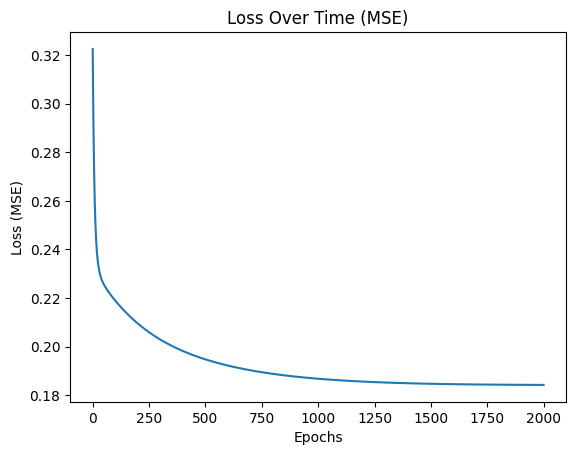

In [252]:
# Plot the loss over time
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Over Time (MSE)')
plt.show()

In [253]:
# Final Weights and Biases
print("Final Weights (w):", w)
print("Final Biases (b):", b)

Final Weights (w): [[-2.85535029]
 [ 2.98579552]]
Final Biases (b): [[0.1117954]]


In [254]:
# Test with new data (Area, Bathrooms)
new_data_1 = np.array([[2500, 3]])
new_data_2 = np.array([[2800, 4]])

# Normalize the new data
test_property_1 = (new_data_1 - x_min) / (x_max - x_min)
test_property_2 = (new_data_2 - x_min) / (x_max - x_min)

# Predict the classifications
yp_property_1 = sigmoid(np.dot(test_property_1, w) + b)
yp_property_2 = sigmoid(np.dot(test_property_2, w) + b)

# Check if the classification is good or bad
classification_1 = "Good" if yp_property_1 > 0.5 else "Bad"
classification_2 = "Good" if yp_property_2 > 0.5 else "Bad"

# Print the classification results for new properties
print("New Property 1 (Area, Bathrooms):", new_data_1[0])
print("New Property 1 Classification:", classification_1, yp_property_1)

print("New Property 2 (Area, Bathrooms):", new_data_2[0])
print("New Property 2 Classification:", classification_2, yp_property_2)

New Property 1 (Area, Bathrooms): [2500    3]
New Property 1 Classification: Bad [[0.40869177]]
New Property 2 (Area, Bathrooms): [2800    4]
New Property 2 Classification: Good [[0.64445496]]
